# Formular Estimator

The Formular Estimator is a powerful tool used in statistical analysis to estimate the relationship between variables. It is commonly used in regression analysis to determine the coefficients of a mathematical formula that best fits the data.
In this Jupyter Notebook, we will explore the implementation of an easy example. 

Let's get started!

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

First, we start by creating some data

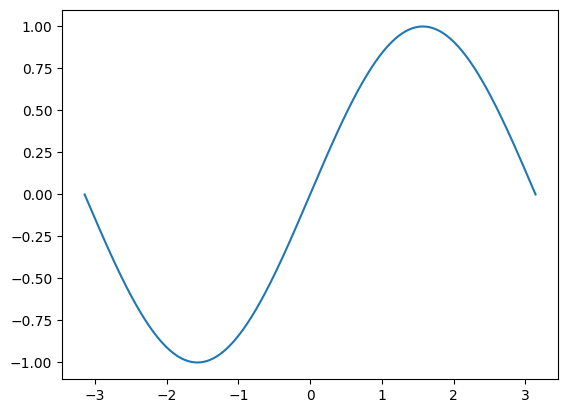

In [24]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
plt.plot(x,y)

Let's assume, we don't know that this is a sine wave. We now roughly what we need, in this case we need a formula of third degree.

In [26]:
class F:
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    d = np.random.randn()
    learning_rate = 1e-6
    losses = []

    def forward(self, x):
        self.y_pred = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        return self.y_pred

    # Gradient descent
    def backward(self, x, y, y_pred):
        # We optimize the loss function with respect to a, b, c, d
        self.losses.append(np.square(y_pred - y).sum())

        # Compute the gradient
        grad_y_pred = 2.0 * (y_pred - y)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()

        # Adjust the weight in the opposite direction of the gradient
        # If our error increases in direction of the gradient, then we can reduce
        # the error by going in the oppposite direction
        self.a -= self.learning_rate * grad_a
        self.b -= self.learning_rate * grad_b
        self.c -= self.learning_rate * grad_c
        self.d -= self.learning_rate * grad_d

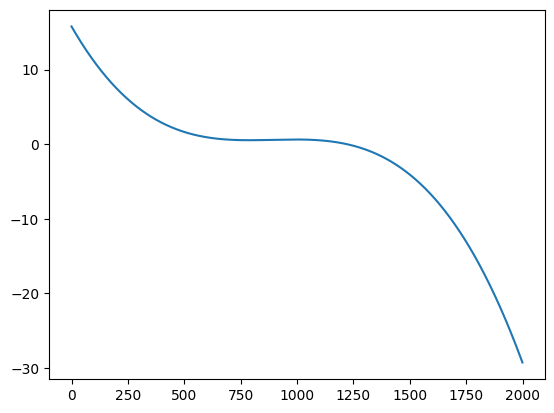

In [27]:
net = F()
plt.plot(net.forward(x))

In [28]:
for t in range(2000):
    y_pred = net.forward(x)
    net.backward(x, y, y_pred)

Result: y = 0.023401219939573073 + 0.8442123299064037 x + -0.004037099837556959 x^2 + -0.09154831714179147 x^3


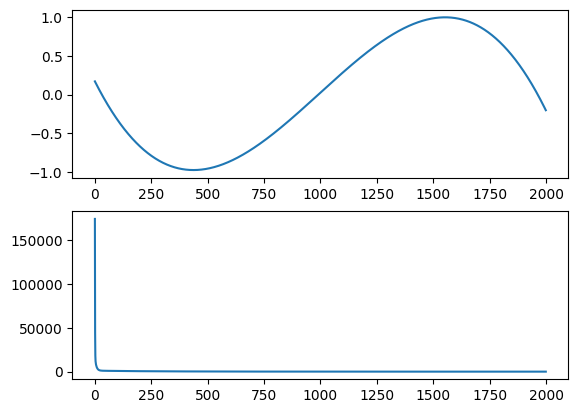

In [29]:
fig, axs = plt.subplots(2,1)
axs[0].plot(net.forward(x))
axs[1].plot(net.losses)
print(f'Result: y = {net.a} + {net.b} x + {net.c} x^2 + {net.d} x^3')